In [1]:
import numpy as np
from dgamod import *
import cmath as cm
import matplotlib as mpl
import matplotlib.pyplot as plt
from numpy import random
import pandas as pd
mpl.rcParams.update({'font.size': 12})
plt.rcParams['axes.axisbelow'] = True
%matplotlib widget
mpl.rcParams['lines.linewidth'] = 2
mpl.rcParams['lines.linewidth'] = 2
#mpl.rcParams['axes.prop_cycle'] = cycler(color='bgrkmyc')

mpl.rcParams['axes.prop_cycle'] = mpl.cycler(color=["b", "g", "r", 'k','y' , 'm','tab:orange', 'tab:cyan', 'tab:brown', 'slategrey', 'deeppink' ]) 

In [11]:
def state_fidelity(state):
    nh = np.shape(state)[0]
    fid = np.real(state[nh-1]*np.conjugate(state[nh-1]))
    return fid


# Comparación de evolución natural y evolución con forzamientos.

In [65]:
# acceder a la solucion

solution_file = "/home/speron/dynga/dinamic_ga/n15_si_2/act_sequence_n15_sample0.dat"
action_sequence = np.genfromtxt(solution_file, dtype=int)
t_steps = len(action_sequence)+1

# parametros del sistema

nh = 15
dt = 0.15
b = 100

# generar propagadores

actions = actions_paper(b, nh)
propagators = gen_props(actions, nh, b, dt)

# definicion del estado inicial e inicializacion de estados forzado y natural

initial_state = np.zeros(nh, dtype=np.complex_)
initial_state[0] = 1.0

forced_state = initial_state
free_state = initial_state

# almacenar evolucion natural y evolucion forzada

forced_evol = [state_fidelity(forced_state)]
natural_evol = [state_fidelity(free_state)]


for action in action_sequence:
    
    forced_state = calculate_next_state(forced_state,action,propagators)
    free_state = calculate_next_state(free_state,0,propagators)

    forced_evol.append(state_fidelity(forced_state))
    natural_evol.append(state_fidelity(free_state))

max_forced = np.max(forced_evol)
time_max_forced = np.argmax(forced_evol)

max_natural = np.max(natural_evol)
time_max_natural = np.argmax(natural_evol)

Propagacion de autoestados: correcta


Text(0.5, 1.0, ' Probabilidad de transmisión, Máximo alcanzado: 0.9352169619494692, Máximo Natural: 0.70196914958881')

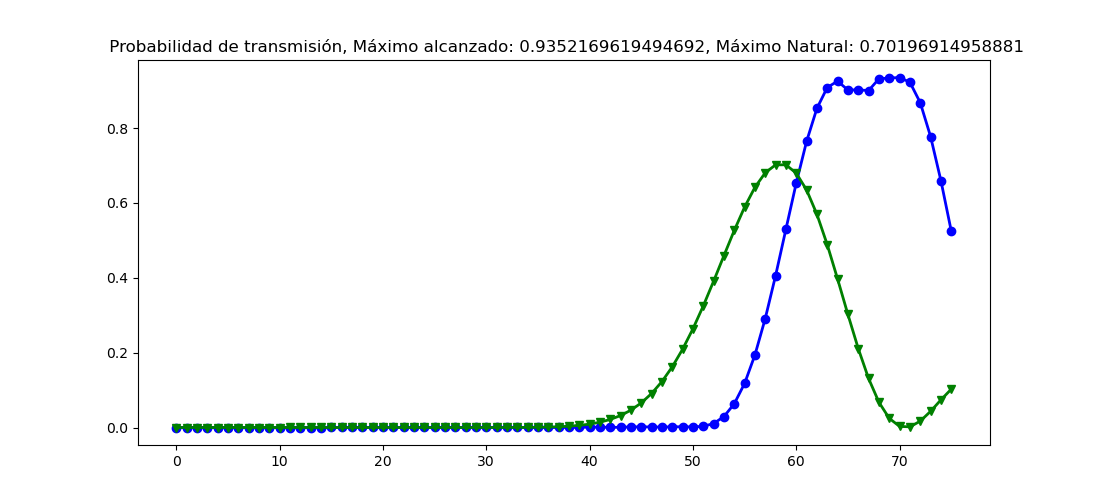

In [66]:
times = np.arange(0,t_steps,1)
axs = plt.figure(figsize=(11,5))

plt.plot(times,forced_evol,'-o', label = 'Forced Evolution')
plt.plot(times,natural_evol, '-v', label = 'Natural Evolution')

plt.title(' Probabilidad de transmisión, Máximo alcanzado: {}, Máximo Natural: {}'.format(max_forced,max_natural))